In [1]:
# Libraries for general purpose
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Text cleaning
import re
import string
import emoji
import nltk
import copy
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.corpus import stopwords

# Data preprocessing
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
# from imblearn.over_sampling import RandomOverSampler
from langdetect import detect, LangDetectException
import contractions
from nltk.tokenize import word_tokenize
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Naive Bayes
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix


from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
rf = RandomForestClassifier(n_estimators=50, random_state=100)

In [2]:
# Clean emojis from text
def strip_emoji(text):
    return emoji.replace_emoji(text, replace='')

# Remove punctuations, stopwords, links, mentions and new line characters
def strip_all_entities(text):

    # Replace newline and carriage return with space, and convert to lowercase
    text = re.sub(r'\r|\n', ' ', text.lower())

    # Remove links and mentions
    # (?:expression) means the expression is not captured
    # either an @, https://, or http:// followed by
    text = re.sub(r"(?:\@|https?\://)\S+", "", text)

    # Remove non-ASCII characters
    text = re.sub(r'[^\x00-\x7f]', '', text)

    # Remove punctuation (MUGA)
    text = re.sub(r'[^\w\s]', '', text)

    # Remove stopwords
    text = ' '.join(word for word in text.split() if word not in stop_words)
    return text

# Clean hashtags at the end of the sentence, and keep those in the middle of the sentence by removing just the # symbol
def clean_hashtags(tweet):
    # Remove hashtags at the end of the sentence
    new_tweet = re.sub(r'(\s+#[\w-]+)+\s*$', '', tweet).strip()

    # Remove the # symbol from hashtags in the middle of the sentence
    new_tweet = re.sub(r'#([\w-]+)', r'\1', new_tweet).strip()

    return new_tweet

# Filter special characters such as & and $ present in some words
def filter_chars(text):
    return ' '.join('' if ('$' in word) or ('&' in word) else word for word in text.split())

# Remove multiple spaces
def remove_mult_spaces(text):
    return re.sub(r"\s\s+", " ", text)

# Function to check if the text is in English, and return an empty string if it's not
def filter_non_english(text):
    try:
        lang = detect(text)
    except LangDetectException:
        lang = "unknown"
    return text if lang == "en" else ""

# Expand contractions
def expand_contractions(text):
    return contractions.fix(text)

# Remove numbers
def remove_numbers(text):
    return re.sub(r'\d+', '', text)

# Lemmatize words (MUGA)
def lemmatize(text):
    words = word_tokenize(text)
    lemmatized_words = [lemmatizer.lemmatize(word, pos="v") for word in words]
    lemmatized_words = [lemmatizer.lemmatize(word, pos="n") for word in lemmatized_words]
    lemmatized_words = [lemmatizer.lemmatize(word, pos="a") for word in lemmatized_words]
    lemmatized_words = [lemmatizer.lemmatize(word, pos="r") for word in lemmatized_words]
    lemmatized_words = [lemmatizer.lemmatize(word, pos="s") for word in lemmatized_words]
    return ' '.join(lemmatized_words)

# Remove short words
def remove_short_words(text, min_len=2):
    words = text.split()
    long_words = [word for word in words if len(word) >= min_len]
    return ' '.join(long_words)

# Replace elongated words with their base form
def replace_elongated_words(text):
    regex_pattern = r'\b(\w+)((\w)\3{2,})(\w*)\b'
    return re.sub(regex_pattern, r'\1\3\4', text)

# Remove repeated punctuation
def remove_repeated_punctuation(text):
    return re.sub(r'[\?\.\!]+(?=[\?\.\!])', '', text)

# Remove extra whitespace
def remove_extra_whitespace(text):
    return ' '.join(text.split())

def remove_url_shorteners(text):
    return re.sub(r'(?:http[s]?://)?(?:www\.)?(?:bit\.ly|goo\.gl|t\.co|tinyurl\.com|tr\.im|is\.gd|cli\.gs|u\.nu|url\.ie|tiny\.cc|alturl\.com|ow\.ly|bit\.do|adoro\.to)\S+', '', text)

# Remove spaces at the beginning and end of the tweet
def remove_spaces_tweets(tweet):
    return tweet.strip()

# Remove short tweets
def remove_short_tweets(tweet, min_words=3):
    words = tweet.split()
    return tweet if len(words) >= min_words else ""

In [3]:
def clean_tweet(tweet):
    tweet = strip_emoji(tweet)
    tweet = expand_contractions(tweet)
    tweet = filter_non_english(tweet)
    tweet = strip_all_entities(tweet)
    tweet = clean_hashtags(tweet)
    tweet = filter_chars(tweet)
    tweet = remove_mult_spaces(tweet)
    tweet = remove_numbers(tweet)
    tweet = lemmatize(tweet)
    tweet = remove_short_words(tweet)
    tweet = replace_elongated_words(tweet)
    tweet = remove_repeated_punctuation(tweet)
    tweet = remove_extra_whitespace(tweet)
    tweet = remove_url_shorteners(tweet)
    tweet = remove_spaces_tweets(tweet)
    tweet = remove_short_tweets(tweet)
    tweet = ' '.join(tweet.split())  # Remove multiple spaces between words
    return tweet

In [4]:
def conf_matrix(y, y_pred, title, labels):
    fig, ax =plt.subplots(figsize=(12,12))
    ax=sns.heatmap(confusion_matrix(y, y_pred), annot=True, cmap="Purples", fmt='g', cbar=False, annot_kws={"size":30})
    plt.title(title, fontsize=25)
    ax.xaxis.set_ticklabels(labels, fontsize=10)
    ax.yaxis.set_ticklabels(labels, fontsize=10)
    ax.set_ylabel('Test', fontsize=25)
    ax.set_xlabel('Predicted', fontsize=25)
    plt.show()

In [5]:
df = pd.read_csv("cyberbullying_tweets.csv")

In [6]:
df['text_clean'] = [clean_tweet(tweet) for tweet in df['tweet_text']]

In [7]:
df

,tweet_text,cyberbullying_type,text_clean
0,"In other words #katandandre, your food was cra...",not_cyberbullying,word katandandre food crapilicious mkr
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying,aussietv white mkr theblock imacelebrityau tod...
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying,classy whore red velvet cupcake
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying,meh thank head concern another angry dude twitter
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying,isi account pretend kurdish account like islam...
...,...,...,...
47687,"Black ppl aren't expected to do anything, depe...",ethnicity,black people expect anything depend anything y...
47688,Turner did not withhold his disappointment. Tu...,ethnicity,turner withhold disappointment turner call cou...
47689,I swear to God. This dumb nigger bitch. I have...,ethnicity,swear god dumb nigger bitch get bleach hair re...
47690,Yea fuck you RT @therealexel: IF YOURE A NIGGE...,ethnicity,yea fuck rt nigger fuck unfollow fuck dumb nigger


In [8]:
df['text_len'] = [len(text.split()) for text in df.text_clean]

## Visualization

In [9]:
clean_length = df['text_clean'].str.len()
clean_short_tweets = clean_length[clean_length < 230]
clean_short_tweets.sort_values(ascending = False)

20383    229
18364    229
21546    229
22108    229
38539    229
        ... 
11610      0
4504       0
4506       0
26256      0
28227      0
Name: text_clean, Length: 47641, dtype: int64

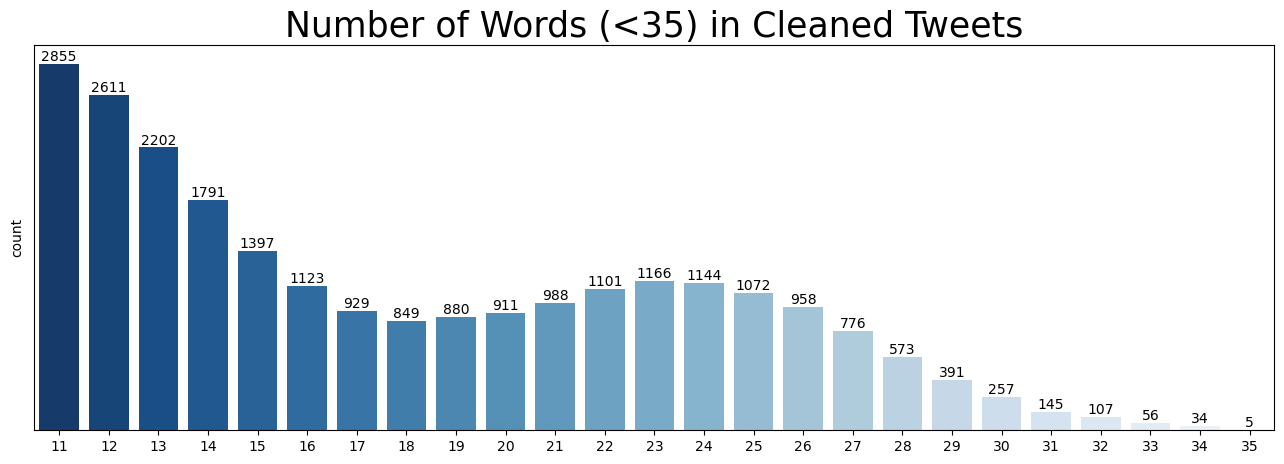

In [10]:
plt.figure(figsize=(16,5))
ax = sns.countplot(x='text_len', data=df[(df['text_len']<=35) & (df['text_len']>10)], palette='Blues_r')
plt.title('Number of Words (<35) in Cleaned Tweets', fontsize=25)
plt.yticks([])
ax.bar_label(ax.containers[0])
plt.ylabel('count')
plt.xlabel('')
plt.show()

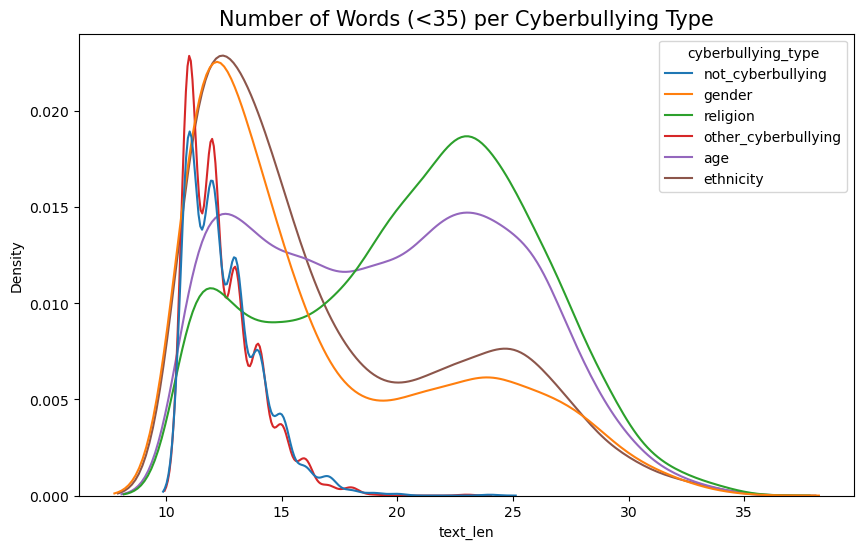

In [11]:
fig = plt.figure(figsize=(10,6))
sns.kdeplot(x='text_len', data=df[(df['text_len']<=35) & (df['text_len']>10)], hue=df["cyberbullying_type"], color="gray")
plt.title('Number of Words (<35) per Cyberbullying Type', fontsize=15)
plt.show()

In [12]:
type_vs_length = df.groupby('cyberbullying_type')['text_len']
type_vs_length.describe()

,count,mean,std,min,25%,50%,75%,max
cyberbullying_type,,,,,,,,
age,7992.0,16.411161,7.447433,0.0,10.0,16.0,23.0,136.0
ethnicity,7961.0,13.493908,7.621495,0.0,9.0,12.0,17.0,173.0
gender,7973.0,12.582466,7.388076,0.0,8.0,11.0,16.0,121.0
not_cyberbullying,7945.0,6.081057,4.806369,0.0,3.0,6.0,9.0,138.0
other_cyberbullying,7823.0,6.400741,7.651033,0.0,3.0,6.0,10.0,372.0
religion,7998.0,17.362341,7.498121,0.0,11.0,19.0,23.0,43.0


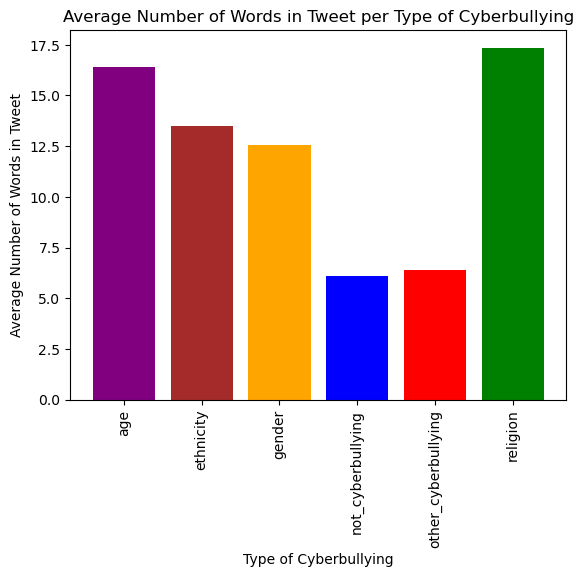

In [13]:
plt.bar(np.arange(6), type_vs_length.mean(), color=["purple", "brown", "orange", "blue", "red", "green"])
plt.title('Average Number of Words in Tweet per Type of Cyberbullying')
plt.xticks(ticks = np.arange(6), labels = type_vs_length.mean().index, rotation = 90)
plt.xlabel('Type of Cyberbullying')
plt.ylabel('Average Number of Words in Tweet')
plt.show()

In [14]:
df["char_len"] = df["text_clean"].str.len()

C:\Users\Sheen\AppData\Local\Temp\ipykernel_10368\570800414.py:4: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  Y,X = np.histogram(clean_short_tweets, 25, normed=1)


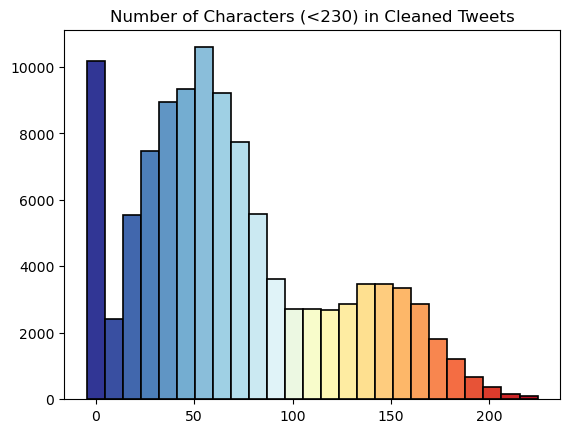

In [15]:
cm = plt.cm.get_cmap('RdYlBu_r')

# Get the histogramp
Y,X = np.histogram(clean_short_tweets, 25, normed=1)
x_span = X.max()-X.min()
C = [cm(((x-X.min())/x_span)) for x in X]

plt.bar(X[:-1],Y*1000000,color=C,width=X[1]-X[0], edgecolor='black', linewidth=1.2)
plt.title("Number of Characters (<230) in Cleaned Tweets")
plt.show()

# Machine Learning

In [16]:
df['cyberbullying_type'] = df['cyberbullying_type'].replace({'religion':0,'age':1,'ethnicity':2,'gender':3,'not_cyberbullying':4, 'other_cyberbullying':5})

In [17]:
X = df['text_clean']
y = df['cyberbullying_type']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

## Naive Bayes

In [19]:
clf = CountVectorizer()
X_train_cv =  clf.fit_transform(X_train)
X_test_cv = clf.transform(X_test)

In [20]:
tf_transformer = TfidfTransformer(use_idf=True).fit(X_train_cv)
X_train_tf = tf_transformer.transform(X_train_cv)
X_test_tf = tf_transformer.transform(X_test_cv)

In [21]:
nb_clf = MultinomialNB()
nb_clf.fit(X_train_tf, y_train)

MultinomialNB()

In [22]:
nb_pred = nb_clf.predict(X_test_tf)

In [23]:
print('Classification Report for Naive Bayes:\n',classification_report(y_test, nb_pred))

Classification Report for Naive Bayes:
               precision    recall  f1-score   support

           0       0.57      0.97      0.71      1600
           1       0.71      0.97      0.82      1598
           2       0.84      0.87      0.85      1592
           3       0.84      0.79      0.82      1595
           4       0.65      0.27      0.38      1589
           5       0.63      0.32      0.42      1565

    accuracy                           0.70      9539
   macro avg       0.71      0.70      0.67      9539
weighted avg       0.71      0.70      0.67      9539



In [24]:
sentiments = ["religion","age","ethnicity","gender","not bullying", "other cyberbullying"]

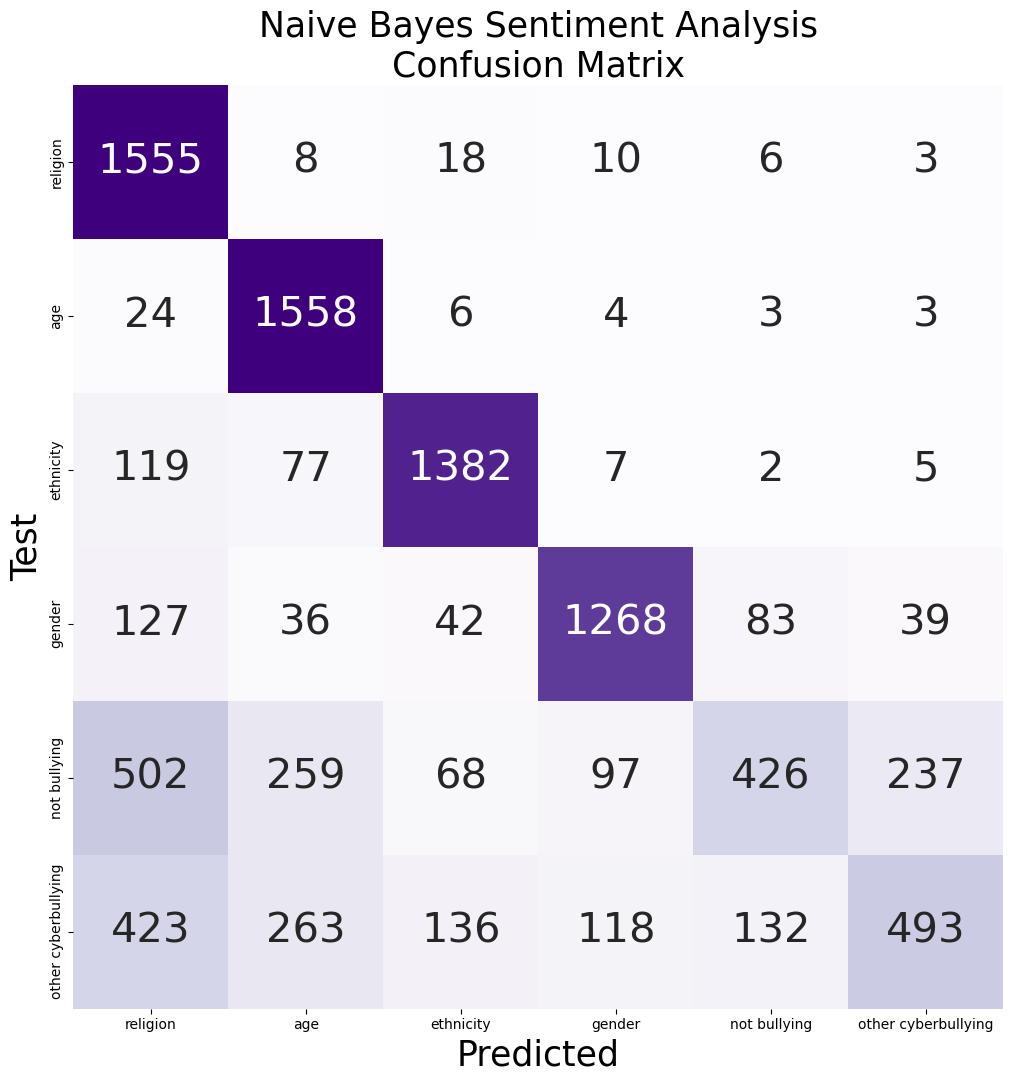

In [25]:
conf_matrix(y_test,nb_pred,'Naive Bayes Sentiment Analysis\nConfusion Matrix', sentiments)

## Random Forest

In [26]:
rf.fit(X_train_cv, y_train)

RandomForestClassifier(n_estimators=50, random_state=100)

In [27]:
y_pred_rf = rf.predict(X_test_cv)

In [28]:
report_rf = classification_report(y_test, y_pred_rf)
print("Classification report of Random Forest classifier:\n", report_rf)

Classification report of Random Forest classifier:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96      1600
           1       0.97      0.97      0.97      1598
           2       0.98      0.94      0.96      1592
           3       0.92      0.80      0.85      1595
           4       0.48      0.62      0.54      1589
           5       0.55      0.50      0.52      1565

    accuracy                           0.80      9539
   macro avg       0.81      0.80      0.80      9539
weighted avg       0.81      0.80      0.80      9539



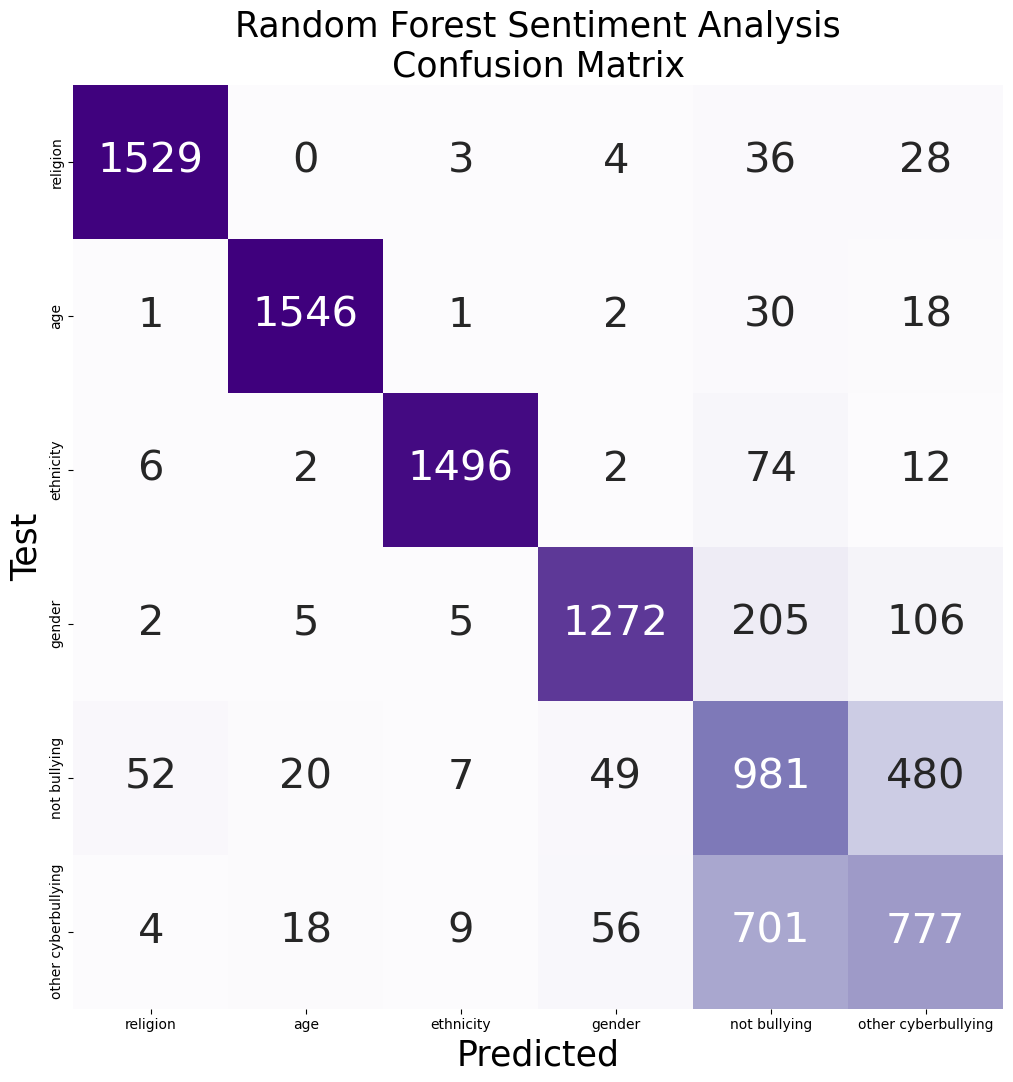

In [29]:
conf_matrix(y_test,y_pred_rf,'Random Forest Sentiment Analysis\nConfusion Matrix', sentiments)

## Support Vector Machine

In [30]:
svm = LinearSVC(random_state=100)
svm.fit(X_train_cv, y_train)

LinearSVC(random_state=100)

In [31]:
y_pred_svm = svm.predict(X_test_cv)

In [32]:
report_svm = classification_report(y_test, y_pred_svm)
print("Classification report of Linear SVM:\n", report_svm)

Classification report of Linear SVM:
               precision    recall  f1-score   support

           0       0.94      0.94      0.94      1600
           1       0.94      0.96      0.95      1598
           2       0.97      0.93      0.95      1592
           3       0.88      0.80      0.84      1595
           4       0.46      0.58      0.52      1589
           5       0.54      0.46      0.50      1565

    accuracy                           0.78      9539
   macro avg       0.79      0.78      0.78      9539
weighted avg       0.79      0.78      0.78      9539



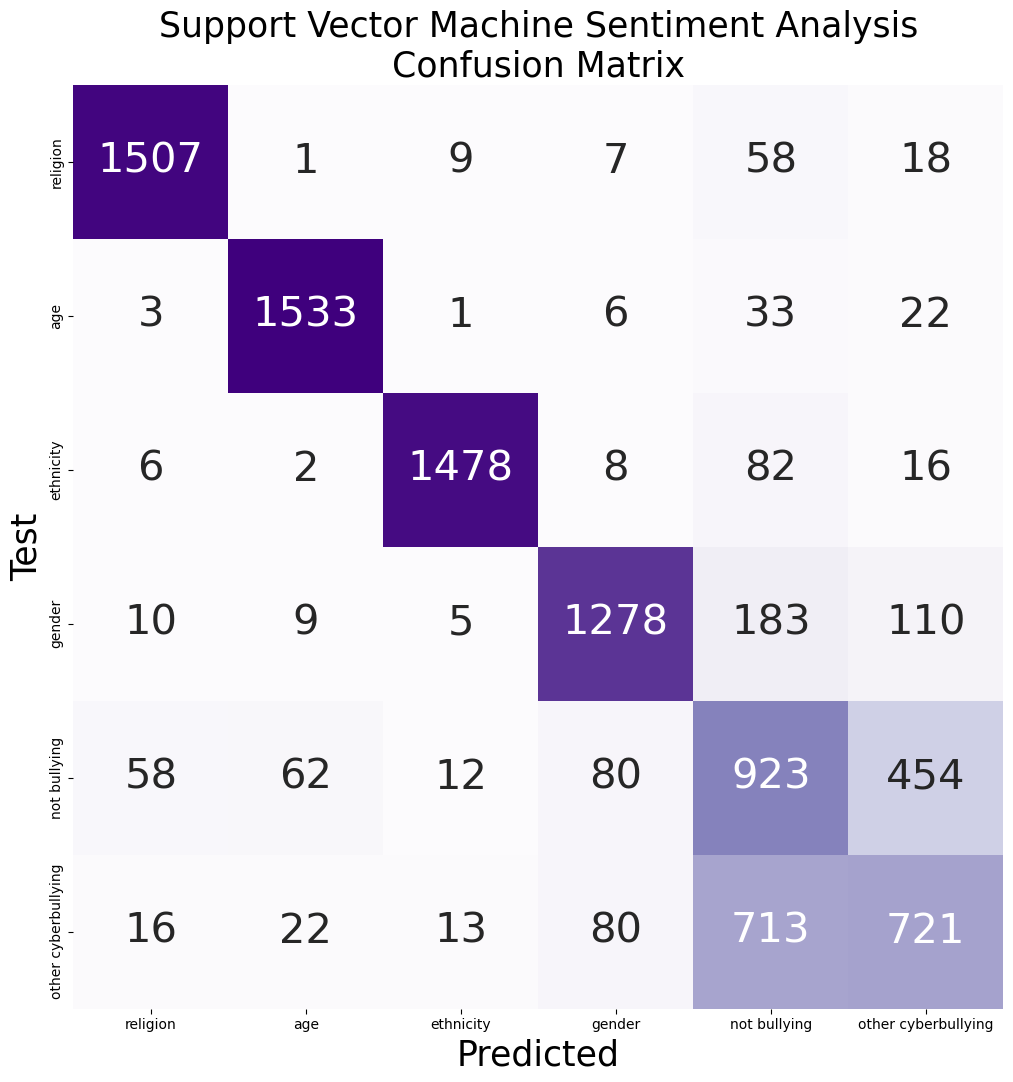

In [33]:
conf_matrix(y_test,y_pred_svm,'Support Vector Machine Sentiment Analysis\nConfusion Matrix', sentiments)

## Further Data Cleaning

In [34]:
df2 = df.copy(deep=True)

In [35]:
df2.drop_duplicates("text_clean", inplace=True)

In [36]:
df2.cyberbullying_type.value_counts()

0    7914
1    7811
2    7435
3    7288
4    6074
5    4903
Name: cyberbullying_type, dtype: int64

In [37]:
df2 = df2[df2["cyberbullying_type"]!=5]

In [38]:
sentiments = ["religion","age","ethnicity","gender","not bullying"]

In [39]:
df2

,tweet_text,cyberbullying_type,text_clean,text_len,char_len
0,"In other words #katandandre, your food was cra...",4,word katandandre food crapilicious mkr,5,38
1,Why is #aussietv so white? #MKR #theblock #ImA...,4,aussietv white mkr theblock imacelebrityau tod...,11,91
2,@XochitlSuckkks a classy whore? Or more red ve...,4,classy whore red velvet cupcake,5,31
3,"@Jason_Gio meh. :P thanks for the heads up, b...",4,meh thank head concern another angry dude twitter,8,49
4,@RudhoeEnglish This is an ISIS account pretend...,4,isi account pretend kurdish account like islam...,8,50
...,...,...,...,...,...
47687,"Black ppl aren't expected to do anything, depe...",2,black people expect anything depend anything y...,21,140
47688,Turner did not withhold his disappointment. Tu...,2,turner withhold disappointment turner call cou...,29,194
47689,I swear to God. This dumb nigger bitch. I have...,2,swear god dumb nigger bitch get bleach hair re...,13,71
47690,Yea fuck you RT @therealexel: IF YOURE A NIGGE...,2,yea fuck rt nigger fuck unfollow fuck dumb nigger,9,49


# Convolutional Neural Network

In [40]:
df_cnn = df2.copy(deep=True)

In [41]:
df_cnn

,tweet_text,cyberbullying_type,text_clean,text_len,char_len
0,"In other words #katandandre, your food was cra...",4,word katandandre food crapilicious mkr,5,38
1,Why is #aussietv so white? #MKR #theblock #ImA...,4,aussietv white mkr theblock imacelebrityau tod...,11,91
2,@XochitlSuckkks a classy whore? Or more red ve...,4,classy whore red velvet cupcake,5,31
3,"@Jason_Gio meh. :P thanks for the heads up, b...",4,meh thank head concern another angry dude twitter,8,49
4,@RudhoeEnglish This is an ISIS account pretend...,4,isi account pretend kurdish account like islam...,8,50
...,...,...,...,...,...
47687,"Black ppl aren't expected to do anything, depe...",2,black people expect anything depend anything y...,21,140
47688,Turner did not withhold his disappointment. Tu...,2,turner withhold disappointment turner call cou...,29,194
47689,I swear to God. This dumb nigger bitch. I have...,2,swear god dumb nigger bitch get bleach hair re...,13,71
47690,Yea fuck you RT @therealexel: IF YOURE A NIGGE...,2,yea fuck rt nigger fuck unfollow fuck dumb nigger,9,49


In [42]:
df_cnn['cyberbullying_type'] = df_cnn['cyberbullying_type'].replace({'religion':0,'age':1,'ethnicity':2,'gender':3,'not_cyberbullying':4, 'other_cyberbullying':5})

In [43]:
df_cnn = df_cnn[['text_clean', 'cyberbullying_type']]

In [44]:
df_cnn['cyberbullying_type'].value_counts()

0    7914
1    7811
2    7435
3    7288
4    6074
Name: cyberbullying_type, dtype: int64

### Enconding the Text Data into Numbers using Word Distribution

In [45]:
#Saves our cleaned text into a list
text_lemmatized = df_cnn['text_clean']
text_processed = list(text_lemmatized)

class_text = df_cnn['cyberbullying_type']
class_text = list(class_text)

In [46]:
types = list(df_cnn['cyberbullying_type'])

In [47]:
#Defining Parameters for Encoding

#Maximum words
num_words = 1000

In [48]:
class Encoding:
    
    #Defines an inherent property of class where we could save variables as we pass through the functions
    def __init__(self, text_processed, num_words):
        
        self.text_processed = text_processed
        self.num_words = num_words
        self.vector_size = None
        self.fdist = None
        self.X_encoded_texts = None
        self.text4encoding = None
        self.X_padded_codes = None
    
    #Encodes the text data into text using most frequent word count (100000 unique word counts considered)
    def text_encoding(self):
        
        #Creates a dictionary where we could assign a word and its corresponding word count
        vocabulary = dict()
        fdist = nltk.FreqDist()  
        
        #Reads the list of sentences, split the sentences into word, and saves its count on fdist per word
        for sentence in self.text_processed:  
            ith_sen = sentence.split()
            for word in ith_sen:
                fdist[word] += 1
        
        #Determines the top 1000 common words
        self.fdist = fdist
        common_words = fdist.most_common(self.num_words)

        #Gets the index of each word depending on common words
        for idx, word in enumerate(common_words):     
            vocabulary[word[0]] = (idx+1)
        
        self.vocabulary = vocabulary
        
        #Gets the respective index of common words for each sentence
        encoded_texts = list()
        texts4encoding = list() 
        
        #Iterates for each sentence and replaces each word with the index in fdist        
        for sentence in self.text_processed:
            temp_codes = list()
            temp_words = list()
            
            ith_sen = sentence.split()
            
            for word in ith_sen:
                if word in self.vocabulary.keys():
                    temp_codes.append(self.vocabulary[word])           #Appends the index
                    temp_words.append(word)                            #Appends the word
                             
            encoded_texts.append(temp_codes)                           #Saves the index in a larger list
            texts4encoding.append(temp_words)                          #Saves the encoded word in a larger list

        self.vector_size = np.max([len(x) for x in encoded_texts])     #Gets the maximum length of sentence
        self.X_encoded_texts = encoded_texts                           #Saves all index-encoded sentences in class
        self.texts4encoding = texts4encoding                           #Saves all words passed in the criteria in class
  
    #Creates padding for each encoded sentences
    def codes_padding(self):
        pad_idx = 0
        padded_codes = list()
        
        codes_from_texts = copy.deepcopy(self.X_encoded_texts)
        
        for encoded_text in codes_from_texts:
            while len(encoded_text) < self.vector_size:
                encoded_text.append(pad_idx)
            padded_codes.append(encoded_text)

        self.X_padded_codes = np.array(padded_codes)
    
    #Shows the first 40 entries of variables assigned for class (can be removed)
    def show_entries(self):
        for entry in self.X_padded_codes[:40]:
            print(entry)
    
    #Returns vector size == maximum length of encodded vector
    def vec_size(self):
        return self.vector_size
        
    #Reflects the first 40 key-item entries for fdist (can be removed)
    def print_40(self):
        count = 0
        for key, value in self.fdist.items():
            print(f"{key}: {value}")
            count += 1
            if count == 40:
                break
    
    def vocab_size(self):
        return (len(self.fdist) + 1)

    def show(self):
        print(self.fdist)
        
    #Reflects maximum length (can be removed)
    def print_vecsize(self):
        print(self.vector_size)

In [49]:
#Implementation of Class on Sample Dataset

code = Encoding(text_processed, num_words) 
code.text_encoding()
code.codes_padding()

In [50]:
wa = code.vocab_size()
wa

34459

In [51]:
ra = code.show()
ra

<FreqDist with 34458 samples and 520899 outcomes>


### Stage 2: Build Dataset and DataLoader

In [52]:
from torch.utils.data import Dataset, DataLoader

class DatasetMapping(Dataset):

    def __init__(self, X, y):
        self.X = X
        self.y = y
        
    #Determines the length of the features
    def __len__(self):
        return len(self.X)
      
    #Determines an item on the dataset based on its index
    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

In [53]:
class   DatasetLoading:
    def __init__(self, padded_codes, targets):
        
        self.X = padded_codes
        self.y = targets
        self.X_train = None
        self.y_train = None
        self.X_test = None
        self.y_test = None
        
    #Splits the data
    def data_split(self):
        
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(self.X, self.y, stratify = self.y, test_size=0.20, random_state=2023129)    

    #Maps the data according to category
    def data_mapping(self):
        
        self.train = DatasetMapping(self.X_train, self.y_train)
        self.test = DatasetMapping(self.X_test, self.y_test)

    #Loads each group into dataloader 
    def data_loading(self):
        self.loader_train = DataLoader(self.train, batch_size=128)
        self.loader_test = DataLoader(self.test, batch_size=128)  
        
    def length(self):
        print(len(self.X_train))
        print(len(self.X_test))
        print(len(self.y_train))
        print(len(self.y_test))
        
    def show_ent(self):
        print(self.y_train[:10])
        print(self.y_test[:10])
        
    def xtrain(self):
        return self.X_train
    
    def ytrain(self):
        return self.y_train

    def xtest(self):
        return self.X_test

    def ytest(self):
        return self.y_test

In [54]:
### Step 3. Dataset and DataLoader
dsl = DatasetLoading(code.X_padded_codes, types)
dsl.data_split()
dsl.data_mapping()
dsl.data_loading()

In [55]:
#Get all necessary values
X_train = np.array(dsl.xtrain())
X_test = np.array(dsl.xtest())
y_train = np.array(dsl.ytrain())
y_test = np.array(dsl.ytest())


print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(29217, 134)
(7305, 134)
(29217,)
(7305,)


In [56]:
from tensorflow.keras.utils import to_categorical
y_train_1hot = to_categorical(y_train)
y_test_1hot = to_categorical(y_test)

### CNN Model

In [57]:
#Important Parameters

input_size = code.vocab_size()
sequence_len = code.vec_size()
embedding_dim = 256
num_classes = 5

In [58]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Embedding, Flatten, Dense, Conv1D, MaxPooling1D, GlobalMaxPooling1D

model1 = Sequential()
model1.add(Embedding(input_size, embedding_dim, input_length=sequence_len))
model1.add(Conv1D(filters=32, kernel_size=5, activation='relu'))
model1.add(MaxPooling1D(pool_size=4))
model1.add(Conv1D(filters=64, kernel_size=5, activation='relu'))
model1.add(MaxPooling1D(pool_size=4))
model1.add(Conv1D(filters=128, kernel_size=5, activation='relu'))
model1.add(GlobalMaxPooling1D())
model1.add(Flatten())
model1.add(Dense(10, activation='relu',kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4)))
model1.add(Dense(5, activation='softmax'))
model1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model1.summary()

history = model1.fit(X_train, y_train_1hot, epochs=100, validation_data=(X_test, y_test_1hot), batch_size=1000)
metrics_df = pd.DataFrame(history.history)
print(metrics_df)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 134, 256)          8821504   
                                                                 
 conv1d (Conv1D)             (None, 130, 32)           40992     
                                                                 
 max_pooling1d (MaxPooling1  (None, 32, 32)            0         
 D)                                                              
                                                                 
 conv1d_1 (Conv1D)           (None, 28, 64)            10304     
                                                                 
 max_pooling1d_1 (MaxPoolin  (None, 7, 64)             0         
 g1D)                                                            
                                                                 
 conv1d_2 (Conv1D)           (None, 3, 128)            4

Epoch 44/100
30/30 [==============================] - 14s 458ms/step - loss: 0.0094 - accuracy: 0.9978 - val_loss: 0.7497 - val_accuracy: 0.8992
Epoch 45/100
30/30 [==============================] - 14s 472ms/step - loss: 0.0089 - accuracy: 0.9978 - val_loss: 0.7638 - val_accuracy: 0.9020
Epoch 46/100
30/30 [==============================] - 14s 456ms/step - loss: 0.0086 - accuracy: 0.9978 - val_loss: 0.7985 - val_accuracy: 0.9028
Epoch 47/100
30/30 [==============================] - 14s 462ms/step - loss: 0.0097 - accuracy: 0.9975 - val_loss: 0.8057 - val_accuracy: 0.9016
Epoch 48/100
30/30 [==============================] - 14s 463ms/step - loss: 0.0096 - accuracy: 0.9977 - val_loss: 0.7969 - val_accuracy: 0.9028
Epoch 49/100
30/30 [==============================] - 14s 454ms/step - loss: 0.0112 - accuracy: 0.9971 - val_loss: 0.8090 - val_accuracy: 0.9042
Epoch 50/100
30/30 [==============================] - 14s 461ms/step - loss: 0.0145 - accuracy: 0.9963 - val_loss: 0.8510 - val_ac

30/30 [==============================] - 15s 492ms/step - loss: 0.0061 - accuracy: 0.9982 - val_loss: 0.9544 - val_accuracy: 0.9020
        loss  accuracy  val_loss  val_accuracy
0   1.518616  0.275011  1.311295      0.439562
1   1.186284  0.484649  1.023994      0.539220
2   0.836066  0.647739  0.655525      0.778371
3   0.464822  0.849437  0.385966      0.887885
4   0.276878  0.916384  0.274649      0.915264
..       ...       ...       ...           ...
95  0.007856  0.997741  0.961777      0.901711
96  0.009516  0.998049  0.989455      0.903354
97  0.007570  0.998152  0.970829      0.902943
98  0.006443  0.998220  0.968458      0.901437
99  0.006057  0.998220  0.954395      0.901985

[100 rows x 4 columns]


In [59]:
# Make predictions on the test set
pred_train = model1.predict(X_train)
pred_test = model1.predict(X_test)

# Get the predicted labels (argmax along the second axis)
pred_train_label = np.argmax(pred_train, axis=1)
pred_test_label = np.argmax(pred_test, axis=1)

229/229 [==============================] - 1s 5ms/step


In [60]:
#Return accuracy for both training and testing accuracy
print("Train Accuracy  : {:.2f} %".format(accuracy_score(pred_train_label, y_train)*100))
print("Test Accuracy   : {:.2f} %".format(accuracy_score(pred_test_label, y_test)*100))

Train Accuracy  : 99.84 %
Test Accuracy   : 90.20 %


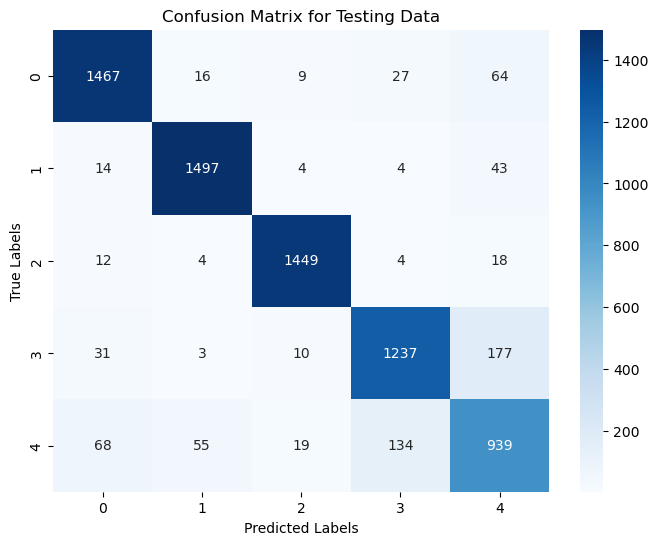

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.93      0.92      1583
           1       0.95      0.96      0.95      1562
           2       0.97      0.97      0.97      1487
           3       0.88      0.85      0.86      1458
           4       0.76      0.77      0.76      1215

    accuracy                           0.90      7305
   macro avg       0.90      0.90      0.90      7305
weighted avg       0.90      0.90      0.90      7305



In [61]:
# Assuming 'y_true' is the true labels and 'y_pred' is the predicted labels
# Replace these with your actual arrays

# Create confusion matrix
cm = confusion_matrix(y_test, pred_test_label)

# Plot confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0,1,2,3,4], yticklabels=[0,1,2,3,4])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Testing Data')
plt.savefig("conf_cnn.png")
plt.show()

# Print classification report
print("Classification Report:")
print(classification_report(y_test, pred_test_label))